<a href="https://colab.research.google.com/github/anomaitech/GSL-basin/blob/main/figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

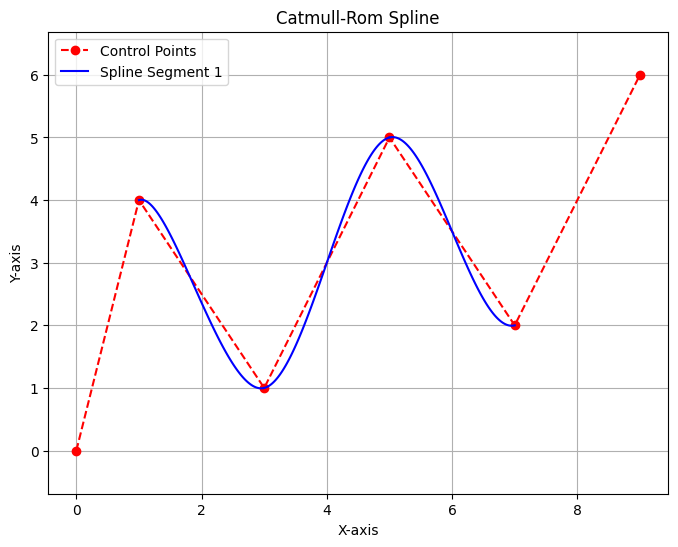

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def catmull_rom_spline(P0, P1, P2, P3, num_points=100):
    """
    Calculates points on a Catmull-Rom spline segment.

    Args:
        P0, P1, P2, P3: Control points (numpy arrays or lists of 2 elements).
        num_points: Number of points to generate for the curve segment.

    Returns:
        Tuple of (x_coords, y_coords) for the spline segment.
    """
    P0, P1, P2, P3 = map(np.array, [P0, P1, P2, P3])
    t = np.linspace(0, 1, num_points)

    # Catmull-Rom formula
    curve_points = 0.5 * (
        (2 * P1) +
        (-P0 + P2) * t[:, np.newaxis] +
        (2 * P0 - 5 * P1 + 4 * P2 - P3) * t[:, np.newaxis]**2 +
        (-P0 + 3 * P1 - 3 * P2 + P3) * t[:, np.newaxis]**3
    )
    return curve_points[:, 0], curve_points[:, 1]

def plot_catmull_rom(control_points, num_segments=100):
    """
    Plots a Catmull-Rom spline through a series of control points.

    Args:
        control_points: List of (x,y) tuples or numpy arrays representing control points.
        num_segments: Number of points to generate for each spline segment.
    """
    plt.figure(figsize=(8, 6))
    plt.plot([p[0] for p in control_points], [p[1] for p in control_points], 'ro--', label='Control Points')

    for i in range(len(control_points) - 3):
        P0, P1, P2, P3 = control_points[i:i+4]
        x_curve, y_curve = catmull_rom_spline(P0, P1, P2, P3, num_segments)
        plt.plot(x_curve, y_curve, 'b-', label=f'Spline Segment {i+1}' if i == 0 else "")

    plt.title('Catmull-Rom Spline')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

if __name__ == '__main__':
    # Example usage
    control_points = [
        (0, 0),
        (1, 4),
        (3, 1),
        (5, 5),
        (7, 2),
        (9, 6)
    ]
    plot_catmull_rom(control_points)

In [1]:
import pandas as pd

file_path = '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx'
sheet_name = 'Grace'

try:
    # Read the Excel file, skipping the first row and using the second row as header
    df_grace = pd.read_excel(file_path, sheet_name=sheet_name, header=1)
    print(f"Successfully loaded '{sheet_name}' sheet from '{file_path}' with the first row as header.")
    display(df_grace.head())
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded 'Grace' sheet from '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx' with the first row as header.


,Years,TWSa,Grace GLDAS 2.1,Grace GWSa,In-Situ GWSa,Change in volume (km3),Annual Loss/Gain,Reference,Change in volume (km3).1,Negative change
0,2002.0,-4.334670,-4.482902,0.148232,-0.459278,0.137856,NaN,0.0,0.137856,0.000000
1,2003.0,-4.065110,-3.972311,-0.092799,-3.484469,-0.086303,-0.224159,0.0,0.000000,-0.086303
2,2004.0,-3.532083,-1.548833,-1.983250,-2.635314,-1.844423,-1.758119,0.0,0.000000,-1.844423
3,2005.0,0.995167,4.469833,-3.474667,2.101157,-3.231440,-1.387018,0.0,0.000000,-3.231440
4,2006.0,3.371500,2.186417,1.185083,2.449286,1.102127,4.333568,0.0,1.102127,0.000000


Creating GRACE GWSa chart for Years vs Grace GWSa...


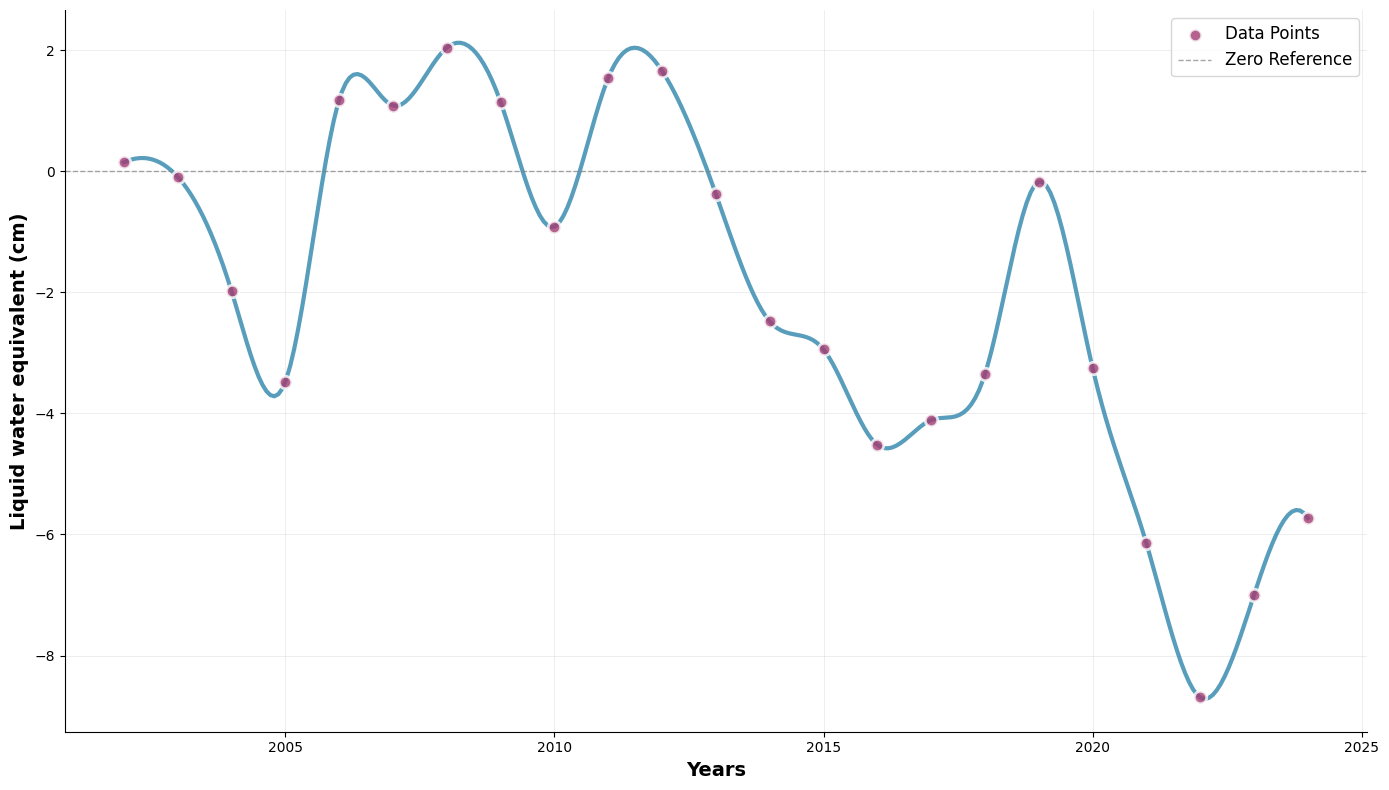


DATA SUMMARY
Total data points: 23
Years: 2002.0 - 2024.0
Grace GWSa Statistics:
  Mean: -2.018
  Std Dev: 3.057
  Min: -8.693
  Max: 2.044


In [4]:

from scipy.interpolate import make_interp_spline

def create_grace_gwsa_chart(df):
    """
    Create a simple beautiful line chart with spline interpolation for Years vs Grace GWSa
    """
    # Set style
    plt.style.use('default')

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data - remove rows with missing values in Years or Grace GWSa
    clean_df = df[['Years', 'Grace GWSa']].dropna()

    # Convert to numeric
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df['Grace GWSa'] = pd.to_numeric(clean_df['Grace GWSa'], errors='coerce')
    clean_df = clean_df.dropna()

    # Sort by years to ensure proper plotting
    clean_df = clean_df.sort_values('Years')

    # print(f"Plotting {len(clean_df)} data points")
    # print(f"Year range: {clean_df['Years'].min()} - {clean_df['Years'].max()}")
    # print(f"GWSa range: {clean_df['Grace GWSa'].min():.2f} - {clean_df['Grace GWSa'].max():.2f}")

    # Extract data
    years = clean_df['Years'].values
    gwsa = clean_df['Grace GWSa'].values

    # Create spline interpolation for smooth curve
    if len(years) >= 3:  # Need at least 3 points for spline
        # Create finer x values for smooth curve
        years_smooth = np.linspace(years.min(), years.max(), 300)

        # Create spline
        spline = make_interp_spline(years, gwsa, k=3)
        gwsa_smooth = spline(years_smooth)

        # Plot smooth line
        ax.plot(years_smooth, gwsa_smooth,
                linewidth=3,
                color='#2E86AB',
                alpha=0.8,
                )

    # Plot original data points
    ax.scatter(years, gwsa,
               color='#A23B72',
               s=80,
               alpha=0.8,
               edgecolor='white',
               linewidth=2,
               zorder=5,
               label='Data Points')

    # Add zero reference line
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=1, label='Zero Reference')

    # Customize the chart
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')

    # Add legend
    ax.legend(fontsize=12, loc='best')

    # Add grid
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

    # Remove top and right spines
    ax.spines[['top', 'right']].set_visible(False)

    # Add statistics as text

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df

# Execute the plotting
print("Creating GRACE GWSa chart for Years vs Grace GWSa...")

# Check if the required columns exist
if 'Years' in df_grace.columns and 'Grace GWSa' in df_grace.columns:
    fig, ax, clean_data = create_grace_gwsa_chart(df_grace)

    # Display data summary
    print(f"\n{'='*50}")
    print("DATA SUMMARY")
    print(f"{'='*50}")
    print(f"Total data points: {len(clean_data)}")
    print(f"Years: {clean_data['Years'].min()} - {clean_data['Years'].max()}")
    print(f"Grace GWSa Statistics:")
    print(f"  Mean: {clean_data['Grace GWSa'].mean():.3f}")
    print(f"  Std Dev: {clean_data['Grace GWSa'].std():.3f}")
    print(f"  Min: {clean_data['Grace GWSa'].min():.3f}")
    print(f"  Max: {clean_data['Grace GWSa'].max():.3f}")

else:
    print("Error: Required columns 'Years' and 'Grace GWSa' not found in the dataset.")
    print("Available columns:", df_grace.columns.tolist())

Creating Change in Volume chart for Years vs Change in volume (km3)...


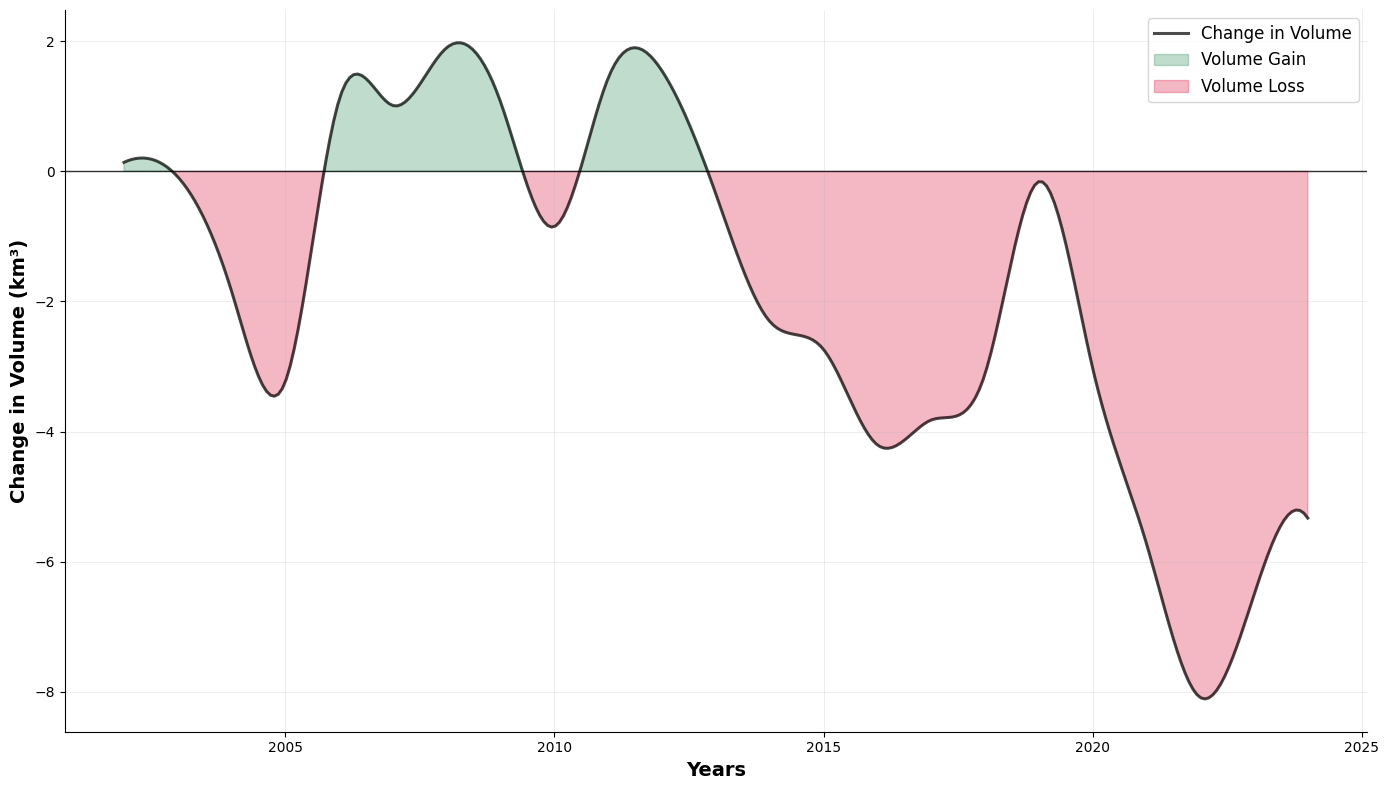


DATA SUMMARY - Change in Volume
Total data points: 23
Years: 2002.0 - 2024.0
Volume Change Statistics:
  Mean: -1.877 km³
  Std Dev: 2.843 km³
  Min: -8.084 km³
  Max: 1.901 km³
  Positive periods: 7
  Negative periods: 16


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def create_volume_comparison_chart(df):
    """
    Create a smooth line chart for Change in Volume (km³) vs Years
    with continuous line and filled colors above/below zero.
    """
    plt.style.use('default')

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data
    clean_df = df[['Years', 'Change in volume (km3)']].dropna()
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df['Change in volume (km3)'] = pd.to_numeric(clean_df['Change in volume (km3)'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    years = clean_df['Years'].values
    volume = clean_df['Change in volume (km3)'].values

    # Smooth curve
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 300)
        spline = make_interp_spline(years, volume, k=3)
        volume_smooth = spline(years_smooth)
    else:
        years_smooth, volume_smooth = years, volume

    # Plot the continuous black line
    ax.plot(years_smooth, volume_smooth, color='black', linewidth=2.2, alpha=0.7, label='Change in Volume')

    # Fill regions above and below zero
    ax.fill_between(years_smooth, volume_smooth, 0, where=volume_smooth >= 0,
                    interpolate=True, color='#2E8B57', alpha=0.3, label='Volume Gain')
    ax.fill_between(years_smooth, volume_smooth, 0, where=volume_smooth < 0,
                    interpolate=True, color='#DC143C', alpha=0.3, label='Volume Loss')

    # Zero reference line
    ax.axhline(0, color='black', linestyle='-', linewidth=1, alpha=0.8)

    # Labels & Title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Change in Volume (km³)', fontsize=14, fontweight='bold')


    # Grid and legend
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.legend(fontsize=12, loc='best')

    # Remove extra spines
    ax.spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === EXECUTION ===
print("Creating Change in Volume chart for Years vs Change in volume (km3)...")

if 'Years' in df_grace.columns and 'Change in volume (km3)' in df_grace.columns:
    fig, ax, clean_data = create_volume_comparison_chart(df_grace)

    print(f"\n{'='*50}")
    print("DATA SUMMARY - Change in Volume")
    print(f"{'='*50}")
    print(f"Total data points: {len(clean_data)}")
    print(f"Years: {clean_data['Years'].min()} - {clean_data['Years'].max()}")
    print(f"Volume Change Statistics:")
    print(f"  Mean: {clean_data['Change in volume (km3)'].mean():.3f} km³")
    print(f"  Std Dev: {clean_data['Change in volume (km3)'].std():.3f} km³")
    print(f"  Min: {clean_data['Change in volume (km3)'].min():.3f} km³")
    print(f"  Max: {clean_data['Change in volume (km3)'].max():.3f} km³")

    positive_count = (clean_data['Change in volume (km3)'] >= 0).sum()
    negative_count = (clean_data['Change in volume (km3)'] < 0).sum()
    print(f"  Positive periods: {positive_count}")
    print(f"  Negative periods: {negative_count}")
else:
    print("Error: Required columns 'Years' and 'Change in volume (km3)' not found in the dataset.")
    print("Available columns:", df_grace.columns.tolist())


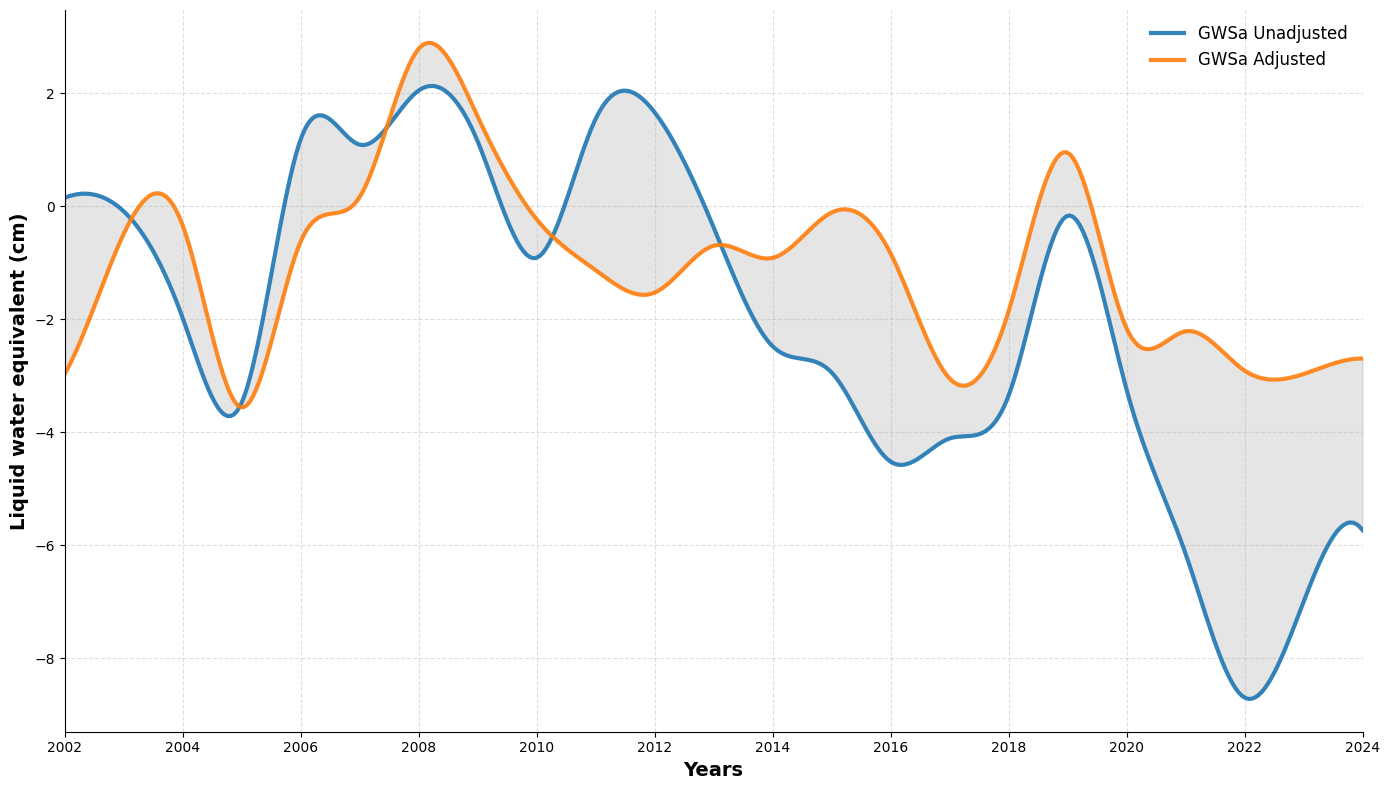

In [6]:

# Load data
grace_adjusted = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='Grace Adjusted'
)


def plot_gwsa_comparison(df):
    """Plot GWSa Unadjusted and Adjusted vs Years with smooth spline curves (x-axis every 2 years)."""
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean & sort
    clean_df = df[['Years', 'GWSa Unadjusted', 'GWSa Adjusted']].dropna()
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df['GWSa Unadjusted'] = pd.to_numeric(clean_df['GWSa Unadjusted'], errors='coerce')
    clean_df['GWSa Adjusted'] = pd.to_numeric(clean_df['GWSa Adjusted'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    years = clean_df['Years'].values
    unadj = clean_df['GWSa Unadjusted'].values
    adj = clean_df['GWSa Adjusted'].values

    # Smooth spline interpolation
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unadj = make_interp_spline(years, unadj, k=3)
        spline_adj = make_interp_spline(years, adj, k=3)
        unadj_smooth = spline_unadj(years_smooth)
        adj_smooth = spline_adj(years_smooth)
    else:
        years_smooth, unadj_smooth, adj_smooth = years, unadj, adj

    # Plot lines
    ax.plot(years_smooth, unadj_smooth, color='#1f77b4', linewidth=3,
            label='GWSa Unadjusted', alpha=0.9)
    ax.plot(years_smooth, adj_smooth, color='#ff7f0e', linewidth=3,
            label='GWSa Adjusted', alpha=0.9)

    # Fill between
    ax.fill_between(years_smooth, unadj_smooth, adj_smooth,
                    color='gray', alpha=0.2)

    # Styling
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')

    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # 🔹 Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    # Optional: make year labels horizontal
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()
    return fig, ax, clean_df

# Run
fig, ax, clean_df = plot_gwsa_comparison(grace_adjusted)


In [8]:
from scipy.stats import pearsonr

# Calculate the correlation between 'GWSa Unadjusted' and 'GWSa Adjusted'
correlation_matrix = grace_adjusted[['GWSa Unadjusted', 'GWSa Adjusted']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Calculate Pearson correlation coefficient and p-value
unadjusted_data = grace_adjusted['GWSa Unadjusted'].dropna()
adjusted_data = grace_adjusted['GWSa Adjusted'].dropna()

# Ensure both series have the same index after dropping NaNs for correct correlation
common_index = unadjusted_data.index.intersection(adjusted_data.index)
unadjusted_data_aligned = unadjusted_data.loc[common_index]
adjusted_data_aligned = adjusted_data.loc[common_index]


if len(common_index) >= 2:
    pearson_r, p_value = pearsonr(unadjusted_data_aligned, adjusted_data_aligned)

    # Calculate R-squared
    r_squared = pearson_r**2

    print(f"\nPearson Correlation Coefficient (r): {pearson_r:.4f}")
    print(f"R-squared (r²): {r_squared:.4f}")
    print(f"P-value: {p_value:.4f}")
else:
    print("\nNot enough data points to calculate Pearson correlation and p-value.")

Correlation Matrix:
                 GWSa Unadjusted  GWSa Adjusted
GWSa Unadjusted         1.000000       0.653902
GWSa Adjusted           0.653902       1.000000

Pearson Correlation Coefficient (r): 0.6539
R-squared (r²): 0.4276
P-value: 0.0007


In [9]:
adjusted_vs_GWDM = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='Adjusted vs GWDM'
)

In [10]:
adjusted_vs_GWDM

,Years,Unfactored Adjusted GRACE GWSa,Factored Adjusted GRACE GWSa,In-Situ GWSa,unadjusted gwsa,Unnamed: 5
0,2002.0,-2.966212,-6.910132,-2.287534,0.148232,2.407034
1,2003.0,-0.488632,-4.503098,-5.116082,-0.092799,0.421479
2,2004.0,-0.344083,-4.081619,-4.103820,-1.983250,1.527094
3,2005.0,-3.559667,-2.554525,2.162194,-3.474667,5.528297
4,2006.0,-0.624083,2.973772,3.208314,1.185083,-4.122005
5,2007.0,0.161833,-1.148232,0.357358,1.086000,4.341567
6,2008.0,2.784250,3.193334,-1.067487,2.044250,-1.575565
7,2009.0,1.582750,1.617770,-0.556558,1.142750,-3.019258
8,2010.0,-0.233500,-1.401488,-1.511711,-0.913500,5.095217
9,2011.0,-1.133624,3.693729,3.373998,1.543876,-5.697134


    Years  Unfactored Adjusted GRACE GWSa  Factored Adjusted GRACE GWSa  \
0  2002.0                       -2.966212                     -6.910132   
1  2003.0                       -0.488632                     -4.503098   
2  2004.0                       -0.344083                     -4.081619   
3  2005.0                       -3.559667                     -2.554525   
4  2006.0                       -0.624083                      2.973772   

   In-Situ GWSa  unadjusted gwsa  Unnamed: 5  
0     -2.287534         0.148232    2.407034  
1     -5.116082        -0.092799    0.421479  
2     -4.103820        -1.983250    1.527094  
3      2.162194        -3.474667    5.528297  
4      3.208314         1.185083   -4.122005  


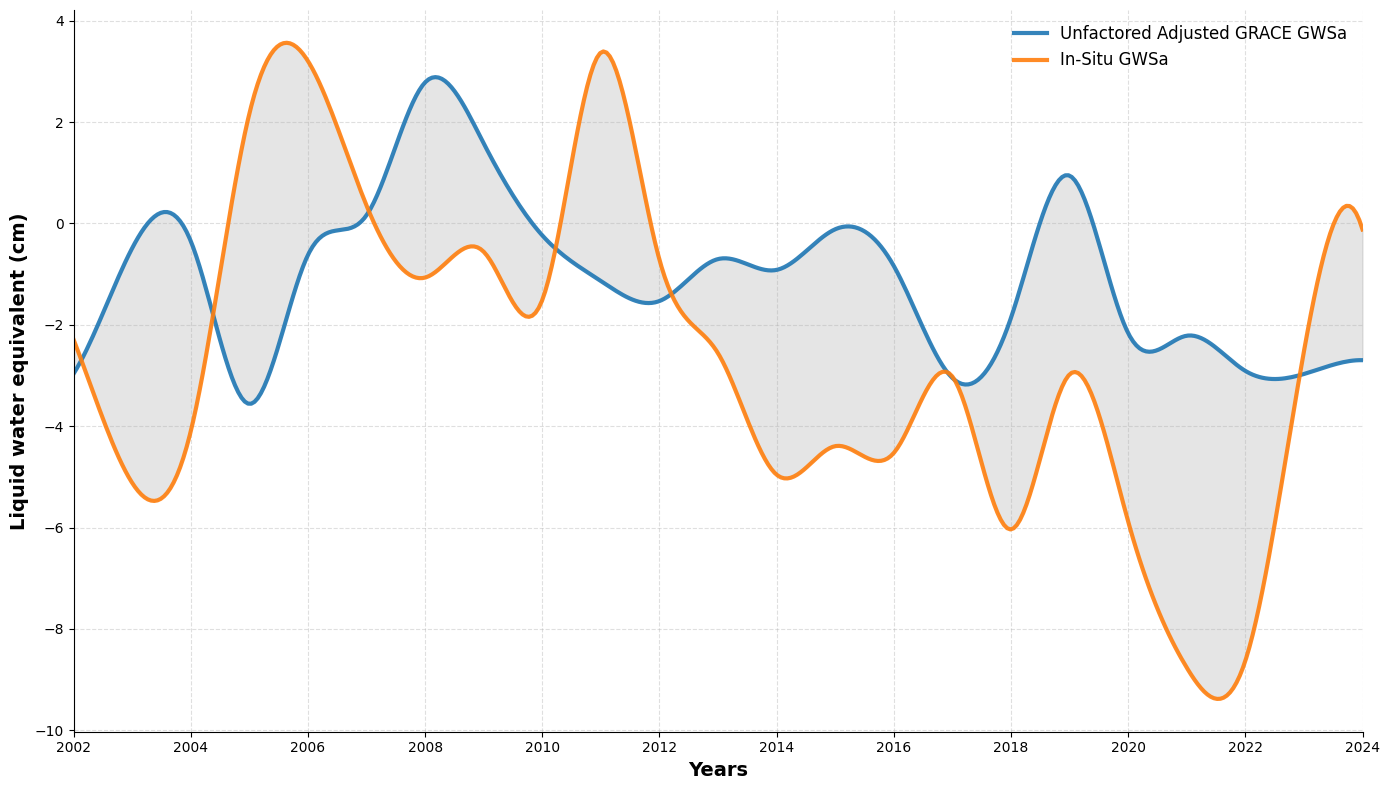

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
adjusted_vs_GWDM = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='Adjusted vs GWDM'
)

print(adjusted_vs_GWDM.head())

# === Plot function ===
def plot_factored_vs_unfactored(df):
    """
    Plot Years vs Factored and Unfactored Adjusted GRACE GWSa with smoothing spline,
    removing NaN values and showing ticks every 2 years.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs
    cols = ['Years', 'Unfactored Adjusted GRACE GWSa', 'In-Situ GWSa']
    clean_df = df[cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years'])
    clean_df['Unfactored Adjusted GRACE GWSa'] = pd.to_numeric(clean_df['Unfactored Adjusted GRACE GWSa'], errors='coerce')
    clean_df['In-Situ GWSa'] = pd.to_numeric(clean_df['In-Situ GWSa'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    # Extract data
    years = clean_df['Years'].values
    unfactored = clean_df['Unfactored Adjusted GRACE GWSa'].values
    factored = clean_df['In-Situ GWSa'].values

    # Spline smoothing
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unfact = make_interp_spline(years, unfactored, k=3)
        spline_fact = make_interp_spline(years, factored, k=3)
        unfact_smooth = spline_unfact(years_smooth)
        fact_smooth = spline_fact(years_smooth)
    else:
        years_smooth, unfact_smooth, fact_smooth = years, unfactored, factored

    # Plot both smooth lines
    ax.plot(years_smooth, unfact_smooth, color='#1f77b4', linewidth=3,
            label='Unfactored Adjusted GRACE GWSa', alpha=0.9)
    ax.plot(years_smooth, fact_smooth, color='#ff7f0e', linewidth=3,
            label='In-Situ GWSa', alpha=0.9)

    # Fill subtle difference region
    ax.fill_between(years_smooth, unfact_smooth, fact_smooth, color='gray', alpha=0.2)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')


    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === Execute ===

fig, ax, clean_df = plot_factored_vs_unfactored(adjusted_vs_GWDM)


    Years  Unfactored Adjusted GRACE GWSa  Factored Adjusted GRACE GWSa  \
0  2002.0                       -2.966212                     -6.910132   
1  2003.0                       -0.488632                     -4.503098   
2  2004.0                       -0.344083                     -4.081619   
3  2005.0                       -3.559667                     -2.554525   
4  2006.0                       -0.624083                      2.973772   

   In-Situ GWSa  Unnamed: 4  
0     -2.287534         NaN  
1     -5.116082         NaN  
2     -4.103820         NaN  
3      2.162194         NaN  
4      3.208314         NaN  


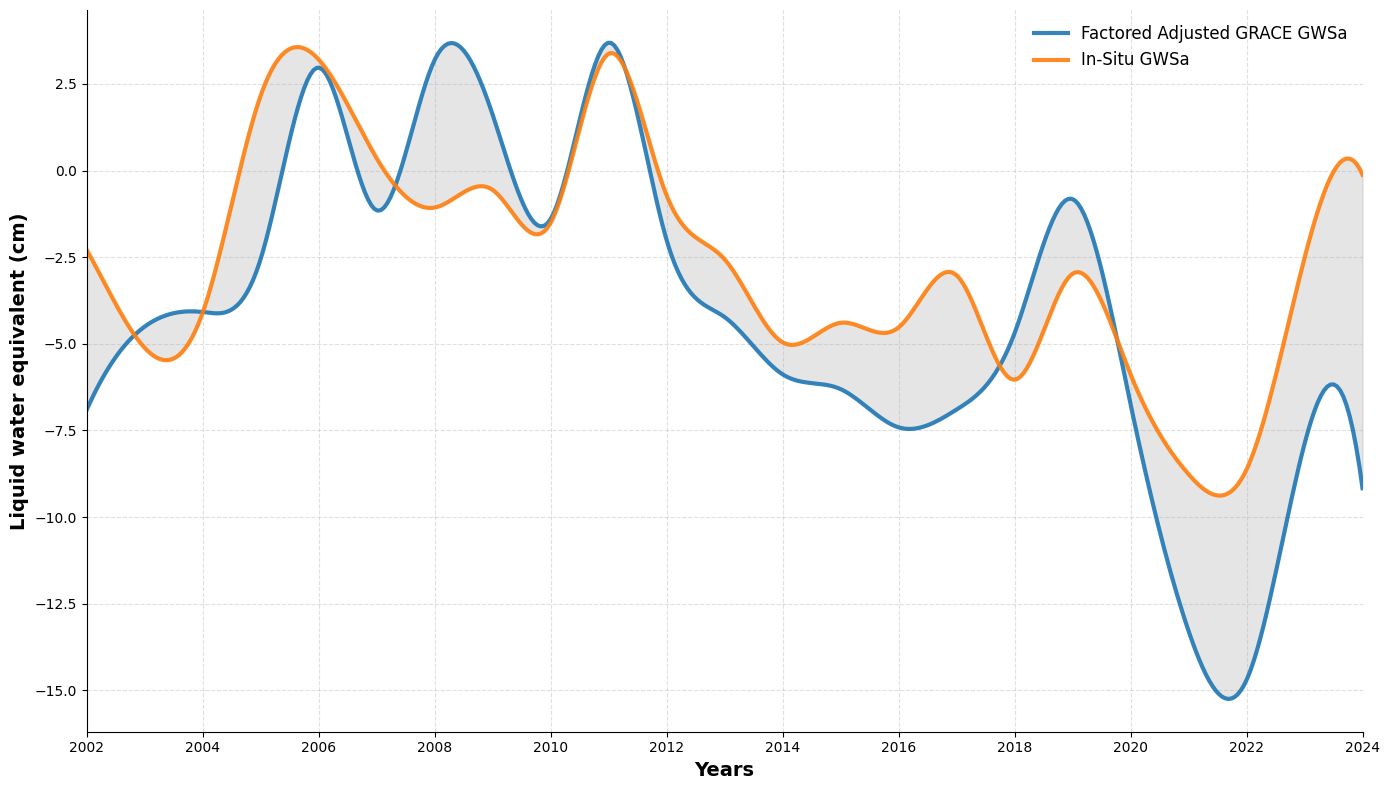

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
adjusted_vs_GWDM = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='Adjusted vs GWDM'
)

print(adjusted_vs_GWDM.head())

# === Plot function ===
def plot_factored_vs_unfactored(df):
    """
    Plot Years vs Factored and Unfactored Adjusted GRACE GWSa with smoothing spline,
    removing NaN values and showing ticks every 2 years.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs
    cols = ['Years', 'Factored Adjusted GRACE GWSa', 'In-Situ GWSa']
    clean_df = df[cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years'])
    clean_df['Factored Adjusted GRACE GWSa'] = pd.to_numeric(clean_df['Factored Adjusted GRACE GWSa'], errors='coerce')
    clean_df['In-Situ GWSa'] = pd.to_numeric(clean_df['In-Situ GWSa'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    # Extract data
    years = clean_df['Years'].values
    unfactored = clean_df['Factored Adjusted GRACE GWSa'].values
    factored = clean_df['In-Situ GWSa'].values

    # Spline smoothing
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unfact = make_interp_spline(years, unfactored, k=3)
        spline_fact = make_interp_spline(years, factored, k=3)
        unfact_smooth = spline_unfact(years_smooth)
        fact_smooth = spline_fact(years_smooth)
    else:
        years_smooth, unfact_smooth, fact_smooth = years, unfactored, factored

    # Plot both smooth lines
    ax.plot(years_smooth, unfact_smooth, color='#1f77b4', linewidth=3,
            label='Factored Adjusted GRACE GWSa', alpha=0.9)
    ax.plot(years_smooth, fact_smooth, color='#ff7f0e', linewidth=3,
            label='In-Situ GWSa', alpha=0.9)

    # Fill subtle difference region
    ax.fill_between(years_smooth, unfact_smooth, fact_smooth, color='gray', alpha=0.2)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')


    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === Execute ===

fig, ax, clean_df = plot_factored_vs_unfactored(adjusted_vs_GWDM)


In [26]:
gldas = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='GLDAS 2.2'
)

In [27]:
gldas

,Years,GLDAS 2.2 TWS,GLDAS 2.2 CLSM GWSa,SWSa,Unadjusted GRACE-based GWSa,GLDAS2.2- factored,adjusted GRACE-based GWSa,factored adjusted GRACE-Based GWSa,GWDM GWSa,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,2003.0,-4.971315,-3.613655,0.395833,-0.092799,3.520856,-0.488632,-4.503098,-5.116082,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004.0,-1.415953,-1.447719,-1.639167,-1.983250,0.535531,-0.344083,-4.081619,-4.103820,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005.0,2.591726,1.980517,0.085000,-3.474667,5.455184,-3.559667,-2.554525,2.162194,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006.0,2.750404,2.265519,1.809167,1.185083,1.080435,-0.624083,2.973772,3.208314,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007.0,-1.999054,-1.322187,0.924167,1.086000,2.408187,0.161833,-1.148232,0.357358,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2008.0,-1.525927,-1.283762,-0.740000,2.044250,3.328012,2.784250,3.193334,-1.067487,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009.0,-0.401197,-0.192368,-0.440000,1.142750,1.335118,1.582750,1.617770,-0.556558,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010.0,-0.382380,-0.308915,-0.680000,-0.913500,0.604585,-0.233500,-1.401488,-1.511711,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011.0,4.796789,3.710442,2.677500,1.543876,2.166567,-1.133624,3.693729,3.373998,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2012.0,-1.655858,-0.992706,3.188333,1.658147,2.650853,-1.530186,-2.003405,-0.712049,0.280657,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

# Load data if not already loaded (ensure 'gldas' DataFrame is available)
# Assuming gldas DataFrame is already loaded from previous steps.

# Define the pairs for correlation analysis with 'GLDAS 2.2 CLSM GWSa'
correlation_pairs_with_gldas = [
    ('GLDAS 2.2 CLSM GWSa', 'Unadjusted GRACE-based GWSa'),
    ('GLDAS 2.2 CLSM GWSa', 'adjusted GRACE-based GWSa'),
    ('GLDAS 2.2 CLSM GWSa', 'factored adjusted GRACE-Based GWSa'),
    ('GLDAS 2.2 CLSM GWSa', 'GWDM GWSa')
]

print("--- Correlation Analysis with GLDAS 2.2 CLSM GWSa ---")

for col1, col2 in correlation_pairs_with_gldas:
    print(f"\nAnalyzing: {col1} vs {col2}")

    # Check if columns exist in the gldas DataFrame
    if col1 in gldas.columns and col2 in gldas.columns:
        # Drop rows with NaN values in either column for the current pair
        temp_df = gldas[[col1, col2]].dropna()

        if len(temp_df) >= 2:
            data1 = temp_df[col1].values
            data2 = temp_df[col2].values

            # Calculate Pearson correlation coefficient and p-value
            pearson_r, p_value = pearsonr(data1, data2)

            # Calculate R-squared
            r_squared = pearson_r**2

            print(f"  Pearson Correlation Coefficient (r): {pearson_r:.4f}")
            print(f"  R-squared (r²): {r_squared:.4f}")
            print(f"  P-value: {p_value:.4f}")
        else:
            print(f"  Not enough data points ({len(temp_df)}) to calculate Pearson correlation and p-value.")
    else:
        print(f"  One or both columns ('{col1}', '{col2}') not found in the 'gldas' DataFrame.")

print("\n--- Analysis Complete ---")

--- Correlation Analysis with GLDAS 2.2 CLSM GWSa ---

Analyzing: GLDAS 2.2 CLSM GWSa vs Unadjusted GRACE-based GWSa
  Pearson Correlation Coefficient (r): 0.4172
  R-squared (r²): 0.1741
  P-value: 0.0534

Analyzing: GLDAS 2.2 CLSM GWSa vs adjusted GRACE-based GWSa
  Pearson Correlation Coefficient (r): 0.0072
  R-squared (r²): 0.0001
  P-value: 0.9745

Analyzing: GLDAS 2.2 CLSM GWSa vs factored adjusted GRACE-Based GWSa
  Pearson Correlation Coefficient (r): 0.6739
  R-squared (r²): 0.4542
  P-value: 0.0006

Analyzing: GLDAS 2.2 CLSM GWSa vs GWDM GWSa
  Pearson Correlation Coefficient (r): 0.8146
  R-squared (r²): 0.6636
  P-value: 0.0000

--- Analysis Complete ---


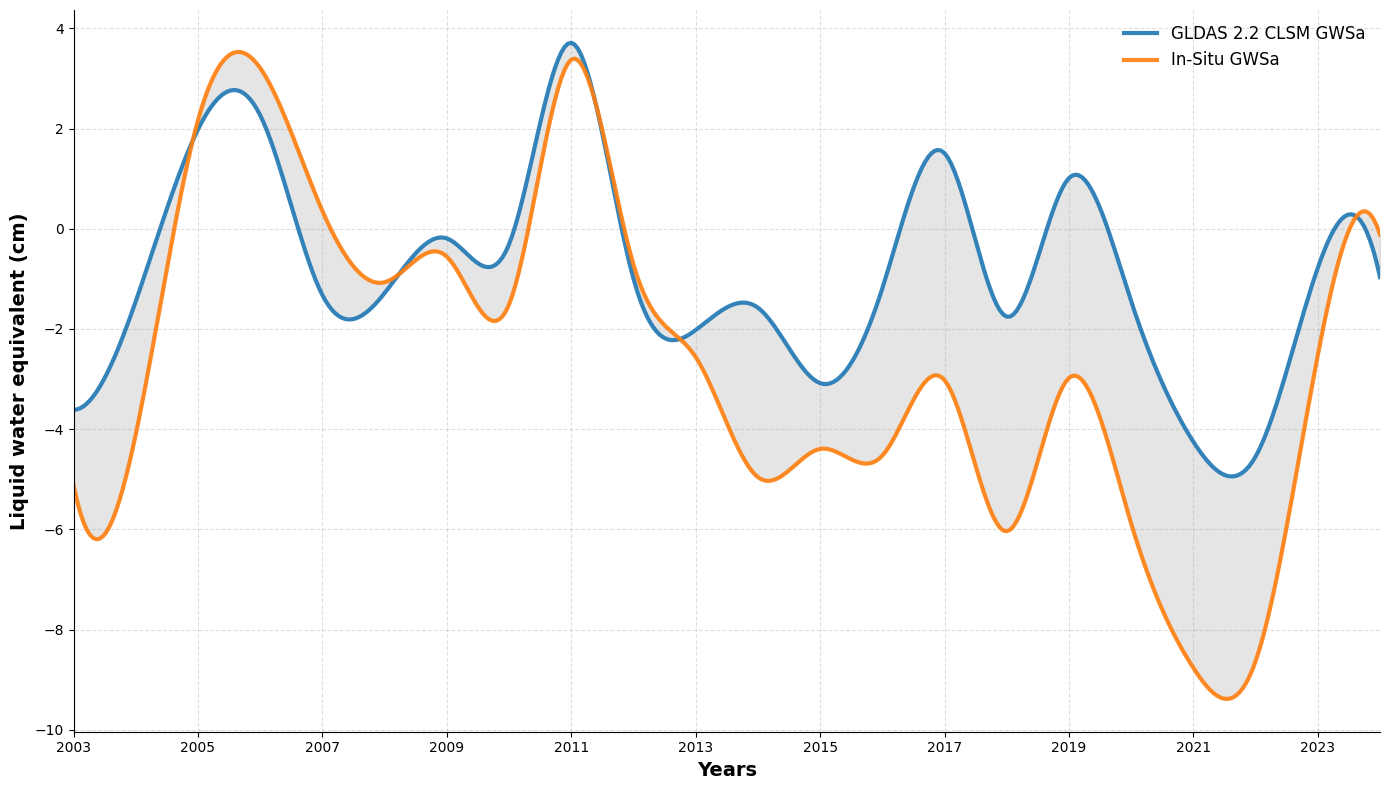

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
gldas = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='GLDAS 2.2'
)



# === Plot function ===
def plot_factored_vs_unfactored(df):
    """
    Plot Years vs Factored and Unfactored Adjusted GRACE GWSa with smoothing spline,
    removing NaN values and showing ticks every 2 years.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs
    cols = ['Years', 'GLDAS 2.2 CLSM GWSa', 'GWDM GWSa']
    clean_df = df[cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years'])
    clean_df['GLDAS 2.2 CLSM GWSa'] = pd.to_numeric(clean_df['GLDAS 2.2 CLSM GWSa'], errors='coerce')
    clean_df['GWDM GWSa'] = pd.to_numeric(clean_df['GWDM GWSa'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years')

    # Extract data
    years = clean_df['Years'].values
    unfactored = clean_df['GLDAS 2.2 CLSM GWSa'].values
    factored = clean_df['GWDM GWSa'].values

    # Spline smoothing
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_unfact = make_interp_spline(years, unfactored, k=3)
        spline_fact = make_interp_spline(years, factored, k=3)
        unfact_smooth = spline_unfact(years_smooth)
        fact_smooth = spline_fact(years_smooth)
    else:
        years_smooth, unfact_smooth, fact_smooth = years, unfactored, factored

    # Plot both smooth lines
    ax.plot(years_smooth, unfact_smooth, color='#1f77b4', linewidth=3,
            label='GLDAS 2.2 CLSM GWSa', alpha=0.9)
    ax.plot(years_smooth, fact_smooth, color='#ff7f0e', linewidth=3,
            label='In-Situ GWSa', alpha=0.9)

    # Fill subtle difference region
    ax.fill_between(years_smooth, unfact_smooth, fact_smooth, color='gray', alpha=0.2)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')


    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # Set x-axis ticks every 2 years
    start_year = int(np.floor(clean_df['Years'].min()))
    end_year = int(np.ceil(clean_df['Years'].max()))
    ax.set_xticks(np.arange(start_year, end_year + 1, 2))
    ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === Execute ===

fig, ax, clean_df = plot_factored_vs_unfactored(gldas)


In [23]:
gldas.columns

Index(['Years', 'GLDAS 2.2 TWS', 'GLDAS 2.2 CLSM GWSa', 'SWSa',
       'Unadjusted GRACE-based GWSa', 'GLDAS2.2- factored',
       'adjusted GRACE-based GWSa', 'factored adjusted GRACE-Based GWSa',
       'GWDM GWSa', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

Creating comparison chart for GLDAS 2.2 CLSM GWSa and Factored Adjusted GRACE-Based GWSa...


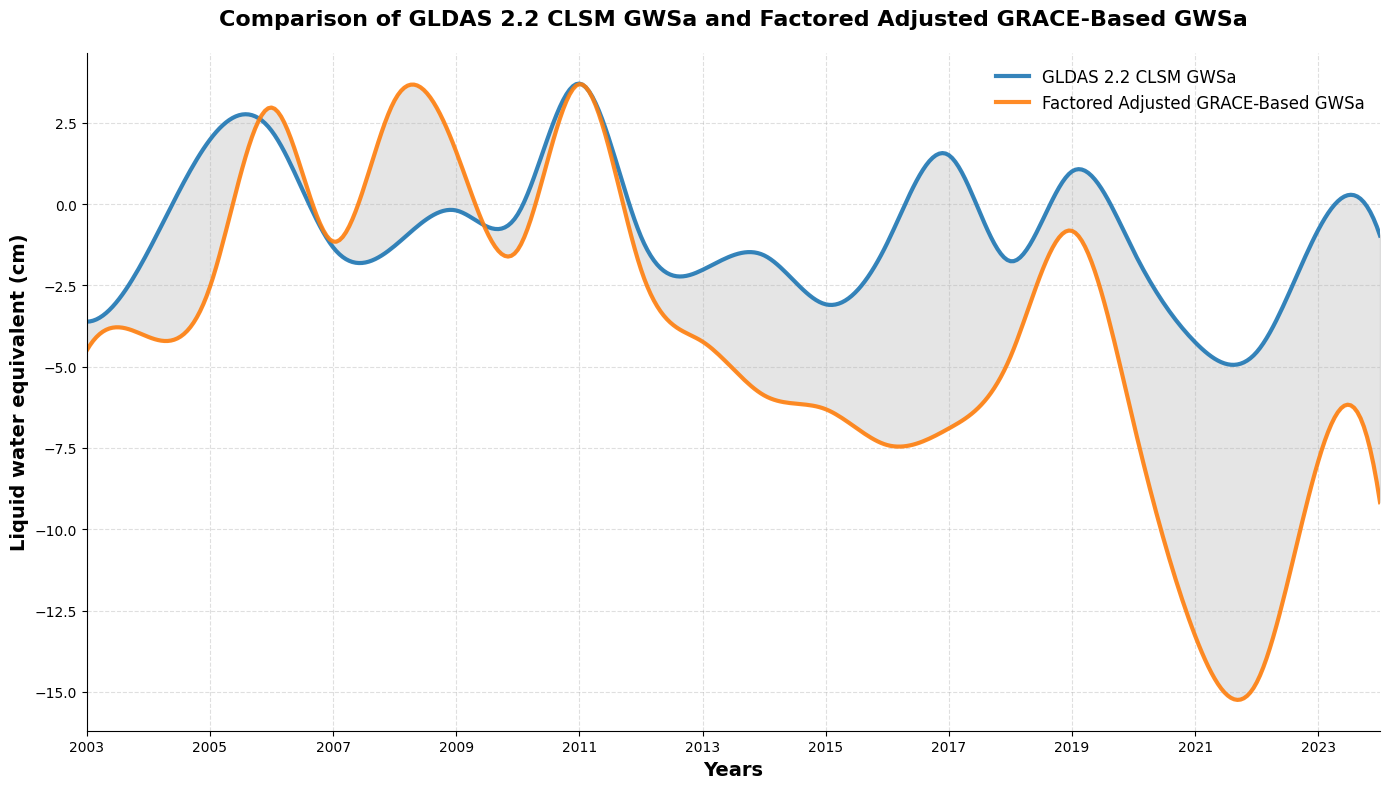


DATA SUMMARY
Total years with data for both columns: 22
Year range: 2003.0 - 2024.0

Summary statistics for plotted variables:
  GLDAS 2.2 CLSM GWSa:
    Mean: -0.922
    Std Dev: 2.070
    Min: -4.545
    Max: 3.710
  factored adjusted GRACE-Based GWSa:
    Mean: -4.193
    Std Dev: 4.885
    Min: -14.706
    Max: 3.694


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
# Data is already loaded as 'gldas' from '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx', sheet_name='GLDAS 2.2'

# === Plot function ===
def plot_gldas_factored_comparison(df):
    """
    Plot Years vs GLDAS 2.2 CLSM GWSa and factored adjusted GRACE-Based GWSa
    with smoothing spline, removing NaN values and showing ticks every 2 years.
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs
    cols = ['Years', 'GLDAS 2.2 CLSM GWSa', 'factored adjusted GRACE-Based GWSa']
    clean_df = df[cols].dropna(subset=['Years', 'GLDAS 2.2 CLSM GWSa', 'factored adjusted GRACE-Based GWSa']) # Drop rows with NaN in either of the two key columns
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df['GLDAS 2.2 CLSM GWSa'] = pd.to_numeric(clean_df['GLDAS 2.2 CLSM GWSa'], errors='coerce')
    clean_df['factored adjusted GRACE-Based GWSa'] = pd.to_numeric(clean_df['factored adjusted GRACE-Based GWSa'], errors='coerce')
    clean_df = clean_df.dropna().sort_values('Years') # Drop any remaining NaNs and sort

    # Extract data
    years = clean_df['Years'].values
    gldas_data = clean_df['GLDAS 2.2 CLSM GWSa'].values
    factored_grace_data = clean_df['factored adjusted GRACE-Based GWSa'].values

    # Spline smoothing
    if len(years) >= 3:
        years_smooth = np.linspace(years.min(), years.max(), 400)
        spline_gldas = make_interp_spline(years, gldas_data, k=3)
        spline_factored_grace = make_interp_spline(years, factored_grace_data, k=3)
        gldas_smooth = spline_gldas(years_smooth)
        factored_grace_smooth = spline_factored_grace(years_smooth)
    else:
        years_smooth, gldas_smooth, factored_grace_smooth = years, gldas_data, factored_grace_data


    # Plot both smooth lines
    ax.plot(years_smooth, gldas_smooth, color='#1f77b4', linewidth=3,
            label='GLDAS 2.2 CLSM GWSa', alpha=0.9)
    ax.plot(years_smooth, factored_grace_smooth, color='#ff7f0e', linewidth=3,
            label='Factored Adjusted GRACE-Based GWSa', alpha=0.9)

    # Fill subtle difference region
    ax.fill_between(years_smooth, gldas_smooth, factored_grace_smooth, color='gray', alpha=0.2)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')
    ax.set_title('Comparison of GLDAS 2.2 CLSM GWSa and Factored Adjusted GRACE-Based GWSa',
                 fontsize=16, fontweight='bold', pad=20)


    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)
    ax.legend(fontsize=12, frameon=False)

    # Set x-axis ticks every 2 years
    if len(years) > 0:
        start_year = int(np.floor(clean_df['Years'].min()))
        end_year = int(np.ceil(clean_df['Years'].max()))
        ax.set_xticks(np.arange(start_year, end_year + 1, 2))
        ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df


# === Execute ===
print("Creating comparison chart for GLDAS 2.2 CLSM GWSa and Factored Adjusted GRACE-Based GWSa...")

# Pass the gldas dataframe to the plotting function
fig, ax, clean_df = plot_gldas_factored_comparison(gldas)

# Display data summary for the plotted data
print(f"\n{'='*60}")
print("DATA SUMMARY")
print(f"{'='*60}")
print(f"Total years with data for both columns: {len(clean_df)}")
if len(clean_df) > 0:
    print(f"Year range: {clean_df['Years'].min()} - {clean_df['Years'].max()}")
    print(f"\nSummary statistics for plotted variables:")
    for col in ['GLDAS 2.2 CLSM GWSa', 'factored adjusted GRACE-Based GWSa']:
        mean_val = clean_df[col].mean()
        std_val = clean_df[col].std()
        min_val = clean_df[col].min()
        max_val = clean_df[col].max()
        print(f"  {col}:")
        print(f"    Mean: {mean_val:.3f}")
        print(f"    Std Dev: {std_val:.3f}")
        print(f"    Min: {min_val:.3f}")
        print(f"    Max: {max_val:.3f}")
else:
    print("No data points available for comparison.")

In [ ]:
precipitation = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='precipitation'
)

In [ ]:
precipitation

,Years,Rainfall,one-year lag precipitation,Two-year lag precipitation,3 year shift,4 year shift,Factored Adjusted GRACE based GWSa,GLDAS 2.2 CLSM GWSa,GWDM Based In-situ GWSa
0,1998,490.938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999,290.300,490.938,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,412.567,290.300,490.938,NaN,NaN,NaN,NaN,NaN
3,2001,340.254,412.567,290.300,490.938,NaN,NaN,NaN,NaN
4,2002,211.006,340.254,412.567,290.300,211.006,-7.300883,NaN,-0.459278
5,2003,328.949,211.006,340.254,412.567,328.949,-4.553743,-3.391761,-3.484469
6,2004,415.123,328.949,211.006,340.254,415.123,-3.876167,-1.225825,-2.635314
7,2005,461.284,415.123,328.949,211.006,461.284,-2.564500,3.981313,2.101157
8,2006,357.471,461.284,415.123,328.949,357.471,2.747417,2.757576,2.449286
9,2007,262.175,357.471,461.284,415.123,262.175,-1.264667,-2.337916,-0.420590


Creating simplified comparison chart...
Available columns for plotting: ['Years', 'one-year lag precipitation', 'Factored Adjusted GRACE based GWSa', 'GLDAS 2.2 CLSM GWSa', 'GWDM Based In-situ GWSa']


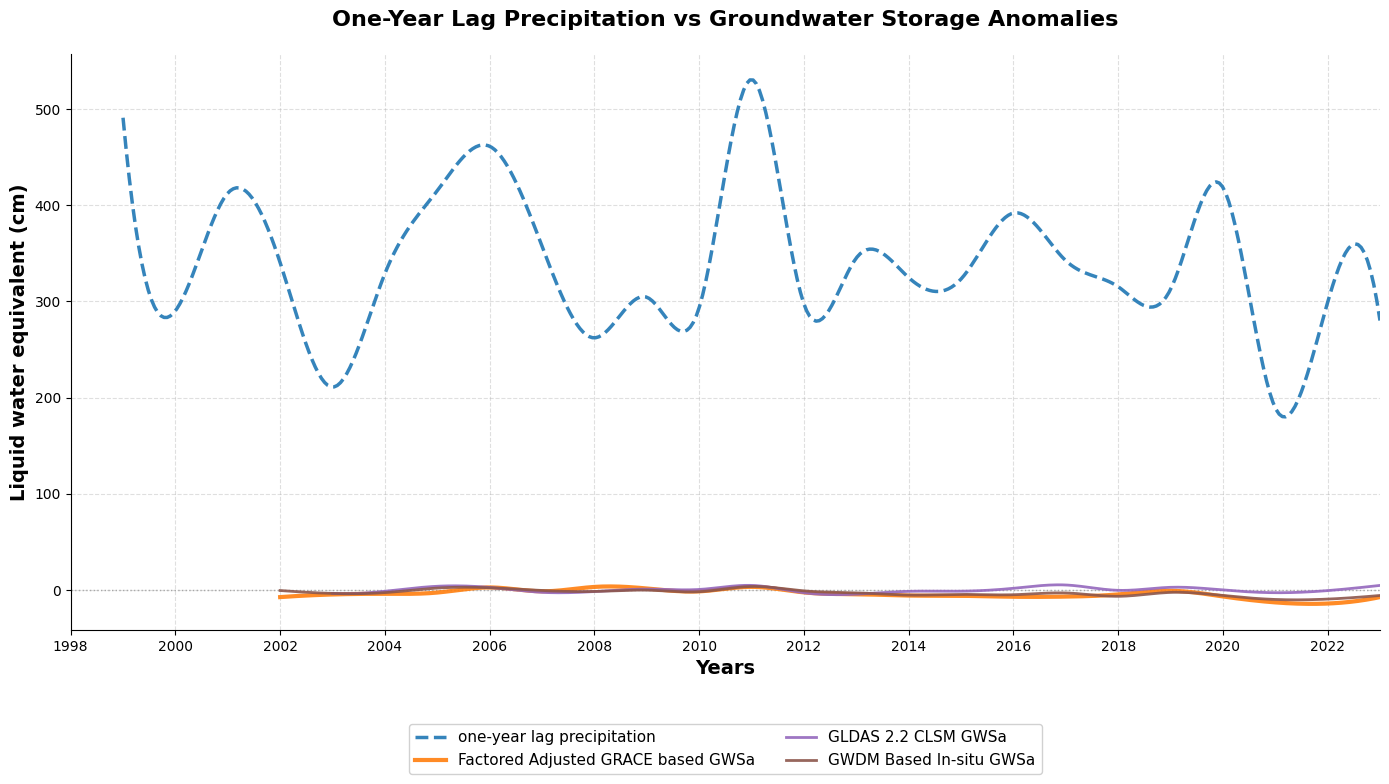


Creating dual-axis version for better scale comparison...


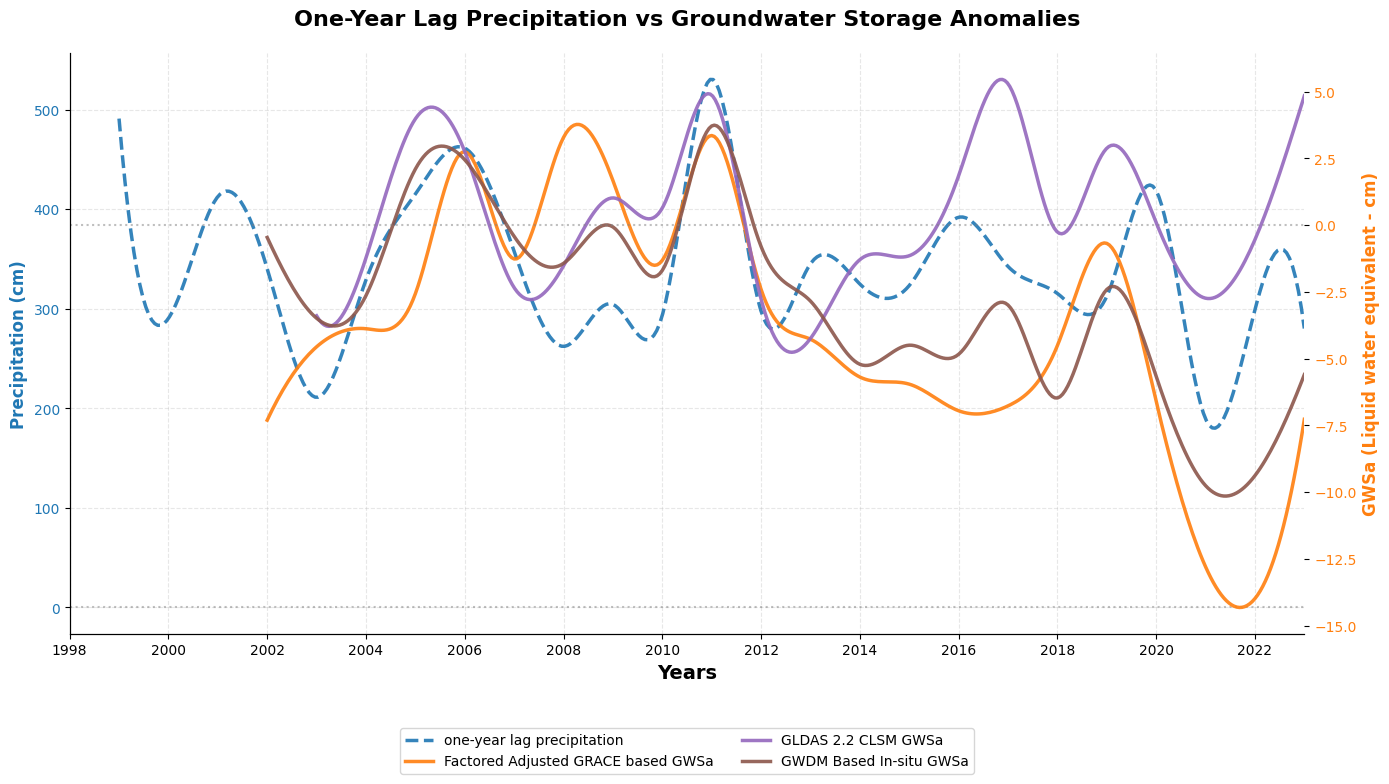


DATA SUMMARY
Total years: 26
Year range: 1998 - 2023

Available variables:
  one-year lag precipitation: 25 points, mean: 341.542
  Factored Adjusted GRACE based GWSa: 22 points, mean: -3.985
  GLDAS 2.2 CLSM GWSa: 21 points, mean: 0.323
  GWDM Based In-situ GWSa: 22 points, mean: -2.834


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# === Load the data ===
precipitation = pd.read_excel(
    '/content/region-gwsa-raw-and-adjusted data GSLB.xlsx',
    sheet_name='precipitation'
)

# === Plot function ===
def plot_simplified_comparison(df):
    """
    Plot simplified comparison of one-year lag precipitation and GWSa metrics
    """
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Clean data and remove NaNs for Years
    cols = [
        'Years',
        'one-year lag precipitation',
        'Factored Adjusted GRACE based GWSa',
        'GLDAS 2.2 CLSM GWSa',
        'GWDM Based In-situ GWSa'
    ]

    # Check which columns actually exist in the dataframe
    available_cols = [col for col in cols if col in df.columns]
    print(f"Available columns for plotting: {available_cols}")

    clean_df = df[available_cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years']).sort_values('Years')

    # Convert all other columns to numeric
    for col in available_cols:
        if col != 'Years':
            clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

    # Extract years
    years = clean_df['Years'].values

    # Define colors and styles for each variable
    colors = {
        'one-year lag precipitation': '#1f77b4',  # Blue
        'Factored Adjusted GRACE based GWSa': '#ff7f0e',  # Orange
        'GLDAS 2.2 CLSM GWSa': '#9467bd',  # Purple
        'GWDM Based In-situ GWSa': '#8c564b'  # Brown
    }

    line_styles = {
        'one-year lag precipitation': '--',  # Dashed for precipitation
        'Factored Adjusted GRACE based GWSa': '-',
        'GLDAS 2.2 CLSM GWSa': '-',
        'GWDM Based In-situ GWSa': '-'
    }

    line_widths = {
        'one-year lag precipitation': 2.5,
        'Factored Adjusted GRACE based GWSa': 3,
        'GLDAS 2.2 CLSM GWSa': 2,
        'GWDM Based In-situ GWSa': 2
    }

    # Plot each available variable with spline smoothing
    for col in available_cols:
        if col != 'Years':
            # Get data for this column
            data = clean_df[col].dropna().values
            col_years = clean_df.loc[clean_df[col].notna(), 'Years'].values

            if len(col_years) >= 3:
                # Create spline smoothing
                years_smooth = np.linspace(col_years.min(), col_years.max(), 400)
                spline = make_interp_spline(col_years, data, k=3)
                data_smooth = spline(years_smooth)

                # Plot with specific style
                ax.plot(years_smooth, data_smooth,
                       color=colors[col],
                       linestyle=line_styles[col],
                       linewidth=line_widths[col],
                       label=col,
                       alpha=0.9)
            else:
                # Plot without smoothing if not enough points
                ax.plot(col_years, data,
                       color=colors[col],
                       linestyle=line_styles[col],
                       linewidth=line_widths[col],
                       label=col,
                       alpha=0.9,
                       marker='o' if len(col_years) <= 10 else None,
                       markersize=4)

    # Add zero reference line
    ax.axhline(y=0, color='gray', linestyle=':', alpha=0.7, linewidth=1, zorder=1)

    # Axis labels & title
    ax.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax.set_ylabel('Liquid water equivalent (cm)', fontsize=14, fontweight='bold')
    ax.set_title('One-Year Lag Precipitation vs Groundwater Storage Anomalies',
                fontsize=16, fontweight='bold', pad=20)

    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines[['top', 'right']].set_visible(False)

    # Legend at middle bottom
    ax.legend(fontsize=11, frameon=True, framealpha=0.9,
              loc='upper center', bbox_to_anchor=(0.5, -0.15),
              ncol=2)

    # Set x-axis ticks every 2 years
    if len(years) > 0:
        start_year = int(np.floor(clean_df['Years'].min()))
        end_year = int(np.ceil(clean_df['Years'].max()))
        ax.set_xticks(np.arange(start_year, end_year + 1, 2))
        ax.set_xlim(start_year, end_year)

    plt.tight_layout()
    plt.show()

    return fig, ax, clean_df

# Alternative version with dual y-axes and bottom legend
def plot_simplified_dual_axis(df):
    """
    Plot with dual y-axes to separate precipitation and GWSa scales
    """
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Clean data
    cols = [
        'Years',
        'one-year lag precipitation',
        'Factored Adjusted GRACE based GWSa',
        'GLDAS 2.2 CLSM GWSa',
        'GWDM Based In-situ GWSa'
    ]

    available_cols = [col for col in cols if col in df.columns]
    clean_df = df[available_cols].dropna(subset=['Years'])
    clean_df['Years'] = pd.to_numeric(clean_df['Years'], errors='coerce')
    clean_df = clean_df.dropna(subset=['Years']).sort_values('Years')

    for col in available_cols:
        if col != 'Years':
            clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

    years = clean_df['Years'].values

    # Create second y-axis
    ax2 = ax1.twinx()

    # Colors
    precip_color = '#1f77b4'  # Blue
    gws_colors = {
        'Factored Adjusted GRACE based GWSa': '#ff7f0e',  # Orange
        'GLDAS 2.2 CLSM GWSa': '#9467bd',  # Purple
        'GWDM Based In-situ GWSa': '#8c564b'  # Brown
    }

    # Plot precipitation on left axis (ax1) - DASHED LINE
    if 'one-year lag precipitation' in available_cols:
        precip_data = clean_df['one-year lag precipitation'].dropna().values
        precip_years = clean_df.loc[clean_df['one-year lag precipitation'].notna(), 'Years'].values

        if len(precip_years) >= 3:
            years_smooth = np.linspace(precip_years.min(), precip_years.max(), 400)
            spline = make_interp_spline(precip_years, precip_data, k=3)
            precip_smooth = spline(years_smooth)

            ax1.plot(years_smooth, precip_smooth,
                    color=precip_color, linestyle='--', linewidth=2.5,
                    label='one-year lag precipitation', alpha=0.9)

    # Plot GWSa metrics on right axis (ax2)
    for col in ['Factored Adjusted GRACE based GWSa', 'GLDAS 2.2 CLSM GWSa', 'GWDM Based In-situ GWSa']:
        if col in available_cols:
            data = clean_df[col].dropna().values
            col_years = clean_df.loc[clean_df[col].notna(), 'Years'].values

            if len(col_years) >= 3:
                years_smooth = np.linspace(col_years.min(), col_years.max(), 400)
                spline = make_interp_spline(col_years, data, k=3)
                data_smooth = spline(years_smooth)

                ax2.plot(years_smooth, data_smooth,
                        color=gws_colors[col], linestyle='-', linewidth=2.5,
                        label=col, alpha=0.9)

    # Customize axes
    ax1.set_xlabel('Years', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Precipitation (cm)', fontsize=12, fontweight='bold', color=precip_color)
    ax2.set_ylabel('GWSa (Liquid water equivalent - cm)', fontsize=12, fontweight='bold', color='#ff7f0e')

    # Color the y-axis labels
    ax1.tick_params(axis='y', labelcolor=precip_color)
    ax2.tick_params(axis='y', labelcolor='#ff7f0e')

    # Add zero lines
    ax1.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
    ax2.axhline(y=0, color='gray', linestyle=':', alpha=0.5)

    # Grid and style
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.spines[['top', 'right']].set_visible(False)
    ax2.spines[['top', 'right']].set_visible(False)

    # Combine legends and place at middle bottom
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2,
               fontsize=10,
               loc='upper center',
               bbox_to_anchor=(0.5, -0.15),
               ncol=2,
               frameon=True)

    # Set x-axis ticks
    if len(years) > 0:
        start_year = int(np.floor(clean_df['Years'].min()))
        end_year = int(np.ceil(clean_df['Years'].max()))
        ax1.set_xticks(np.arange(start_year, end_year + 1, 2))
        ax1.set_xlim(start_year, end_year)

    plt.title('One-Year Lag Precipitation vs Groundwater Storage Anomalies',
             fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    return fig, (ax1, ax2), clean_df

# === Execute ===
print("Creating simplified comparison chart...")
fig1, ax1, clean_df1 = plot_simplified_comparison(precipitation)

print("\nCreating dual-axis version for better scale comparison...")
fig2, axes, clean_df2 = plot_simplified_dual_axis(precipitation)

# Display data summary
print(f"\n{'='*60}")
print("DATA SUMMARY")
print(f"{'='*60}")
print(f"Total years: {len(clean_df1)}")
print(f"Year range: {clean_df1['Years'].min()} - {clean_df1['Years'].max()}")
print(f"\nAvailable variables:")
for col in clean_df1.columns:
    if col != 'Years':
        non_na_count = clean_df1[col].notna().sum()
        if non_na_count > 0:
            mean_val = clean_df1[col].mean()
            print(f"  {col}: {non_na_count} points, mean: {mean_val:.3f}")